### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [701]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [702]:
data = pd.read_csv('data/coupons.csv')

In [703]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [704]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [705]:
#Verify Null/NaN values
data.isna().sum()
#Decision : Need to see if there is a correlation between other column values and the missing value column.
#'car' column has too many missing values and should be dropped if no impact

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [706]:
#Verify the duplicate rows
data[data.duplicated(keep=False)]
#Decision : Drop all duplicates

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4191,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4235,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4279,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [707]:
#Check for any structural issues with data
for col in data.columns:
    print("------------------------\n")
    print(data[col].value_counts())

------------------------

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
------------------------

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
------------------------

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
------------------------

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
------------------------

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
------------------------

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
------------------------

expiration
1d    7091
2h    5593
Name: count, dtype: int64
------------------------

gender
Female    6511
Male      6173
Name: count, dtype: int64
-----------------------

Decisions on column data:
1. destination - change value No Urgent Place to NonUrgent to be concise
2. passanger - rename column name to 'passenger' to fix typo and remove () in the values to keep it simple
3. education - simplify value by changing 'Graduate degree (Masters or Doctorate)' to 'Graduate degree' and 'Some college - no degree' to 'Some college'
4. occupation - remove spaces between & and professions, add & between professions to keep it consistent
5. income - use average value of the given range

3. Decide what to do about your missing data -- drop, replace, other...

In [708]:
#First drop all duplicates
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(12684, 26)
(12610, 26)


In [709]:
#Handle missing values
data.isna().sum()
#Does the type of car affect coupon acceptance
data.groupby('car')[['Y']].mean()

,Y
car,
Car that is too old to install Onstar :D,0.809524
Mazda5,0.727273
Scooter and motorcycle,0.500000
crossover,0.380952
do not drive,0.454545


In [710]:
data_oldcar = data.query('car == "Mazda5"')
for col in data.columns:
    print("------------------------\n")
    print(data_oldcar[col].value_counts())

------------------------

destination
No Urgent Place    13
Work                6
Home                3
Name: count, dtype: int64
------------------------

passanger
Alone        10
Friend(s)     6
Kid(s)        6
Name: count, dtype: int64
------------------------

weather
Sunny    22
Name: count, dtype: int64
------------------------

temperature
80    12
55    10
Name: count, dtype: int64
------------------------

time
2PM     6
7AM     6
10AM    5
6PM     5
Name: count, dtype: int64
------------------------

coupon
Coffee House             7
Restaurant(<20)          6
Carry out & Take away    4
Bar                      3
Restaurant(20-50)        2
Name: count, dtype: int64
------------------------

expiration
1d    11
2h    11
Name: count, dtype: int64
------------------------

gender
Male    22
Name: count, dtype: int64
------------------------

age
26    22
Name: count, dtype: int64
------------------------

maritalStatus
Married partner    22
Name: count, dtype: int64
-----------

In [711]:

data.groupby('education')[['car', 'occupation', 'maritalStatus', 'age', 'gender']].value_counts()


education                               car                                       occupation                       maritalStatus    age  gender
Associates degree                       Car that is too old to install Onstar :D  Computer & Mathematical          Single           21   Male      21
Bachelors degree                        Mazda5                                    Computer & Mathematical          Married partner  26   Male      22
                                        do not drive                              Office & Administrative Support  Single           26   Female    22
                                        crossover                                 Legal                            Married partner  41   Female    21
Graduate degree (Masters or Doctorate)  Scooter and motorcycle                    Sales & Related                  Single           26   Male      22
Name: count, dtype: int64

In [712]:
data['education'].value_counts()

education
Some college - no degree                  4325
Bachelors degree                          4323
Graduate degree (Masters or Doctorate)    1827
Associates degree                         1148
High School Graduate                       899
Some High School                            88
Name: count, dtype: int64

In [713]:
#Good to drop the 'car' column as it is not clear what to fill it with and even if we do based on education, it will be redundant
data = data.drop('car', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null  obj

In [714]:
print(data.isna().sum())
#Coffee House missing value fill
#Find high and low probability labels for coupon being 'some value' and Y=1 and Y=0
data_coffeehouse = data.groupby(['CoffeeHouse', 'coupon'])[['Y']].mean().reset_index()
coffee_label_high = data_coffeehouse.query('coupon == "Coffee House"').sort_values(by='Y', ascending=False).iloc[0,0]
coffee_label_low = data_coffeehouse.query('coupon == "Coffee House"').sort_values(by='Y', ascending=True).iloc[0,0]
coffee_label_median = data_coffeehouse.query('coupon == "Coffee House"')[['Y']].median().reset_index().iloc[0,1]#Get the median value of Y
coffee_label_median = data_coffeehouse.query('coupon == "Coffee House" and Y == @coffee_label_median').iloc[0,0]#Get the label corresponding to median value of Y
print(coffee_label_median,coffee_label_high, coffee_label_low)


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64
1~3 4~8 never


In [715]:
#Fill the missing CoffeeHouse data
data['CoffeeHouse'] = data.apply(lambda x : coffee_label_high if (pd.isna(x['CoffeeHouse'])) & (x['coupon'] == "Coffee House") & (x['Y'] == 1) else x['CoffeeHouse'], axis=1)
data['CoffeeHouse'] = data.apply(lambda x : coffee_label_low  if (pd.isna(x['CoffeeHouse'])) & (x['coupon'] == "Coffee House") & (x['Y'] == 0) else x['CoffeeHouse'], axis=1)
data['CoffeeHouse'] = data.apply(lambda x : coffee_label_median if pd.isna(x['CoffeeHouse']) else x['CoffeeHouse'], axis=1)
print(data.isna().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse               0
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [716]:
#Fill Bar missing values
data_bar = data.groupby(['Bar', 'coupon'])[['Y']].mean().reset_index()
bar_label_high = data_bar.query('coupon == "Bar"').sort_values(by='Y', ascending=False).iloc[0,0]
bar_label_low = data_bar.query('coupon == "Bar"').sort_values(by='Y', ascending=True).iloc[0,0]
bar_label_median = data_bar.query('coupon == "Bar"')[['Y']].median().reset_index().iloc[0,1]#Get the median value of Y
bar_label_median = data_bar.query('coupon == "Bar" and Y == @bar_label_median').iloc[0,0]#Get the label corresponding to median value of Y
print(bar_label_median,bar_label_high, bar_label_low)
print(data_bar)

1~3 4~8 never
      Bar                 coupon         Y
0     1~3                    Bar  0.647355
1     1~3  Carry out & Take away  0.759657
2     1~3           Coffee House  0.498688
3     1~3      Restaurant(20-50)  0.473684
4     1~3        Restaurant(<20)  0.729391
5     4~8                    Bar  0.780000
6     4~8  Carry out & Take away  0.735450
7     4~8           Coffee House  0.524324
8     4~8      Restaurant(20-50)  0.435484
9     4~8        Restaurant(<20)  0.743697
10    gt8                    Bar  0.734694
11    gt8  Carry out & Take away  0.569231
12    gt8           Coffee House  0.451327
13    gt8      Restaurant(20-50)  0.595238
14    gt8        Restaurant(<20)  0.658228
15  less1                    Bar  0.444050
16  less1  Carry out & Take away  0.712286
17  less1           Coffee House  0.504202
18  less1      Restaurant(20-50)  0.420398
19  less1        Restaurant(<20)  0.683794
20  never                    Bar  0.187952
21  never  Carry out & Take away  0.7533

In [717]:
data['Bar'] = data.apply(lambda x : bar_label_high if (pd.isna(x['Bar'])) & (x['coupon'] == "Bar") & (x['Y'] == 1) else x['Bar'], axis=1)
data['Bar'] = data.apply(lambda x : bar_label_low  if (pd.isna(x['Bar'])) & (x['coupon'] == "Bar") & (x['Y'] == 0) else x['Bar'], axis=1)
data['Bar'] = data.apply(lambda x : bar_label_median if pd.isna(x['Bar'])  else x['Bar'], axis=1)
print(data.isna().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [718]:
#Fill CarryAway missing values
data_carryaway = data.groupby(['CarryAway', 'coupon'])[['Y']].mean().reset_index()
carry_label_high = data_carryaway.query('coupon == "Carry out & Take away"').sort_values(by='Y', ascending=False).iloc[0,0]
carry_label_low = data_carryaway.query('coupon == "Carry out & Take away"').sort_values(by='Y', ascending=True).iloc[0,0]
carry_label_median = data_carryaway.query('coupon == "Carry out & Take away"')[['Y']].median().reset_index().iloc[0,1]#Get the median value of Y
carry_label_median = data_carryaway.query('coupon == "Carry out & Take away" and Y == @carry_label_median').iloc[0,0]#Get the label corresponding to median value of Y
print(carry_label_median,carry_label_high, carry_label_low)
print(data_carryaway)

1~3 4~8 less1
   CarryAway                 coupon         Y
0        1~3                    Bar  0.413840
1        1~3  Carry out & Take away  0.734982
2        1~3           Coffee House  0.512735
3        1~3      Restaurant(20-50)  0.460695
4        1~3        Restaurant(<20)  0.732353
5        4~8                    Bar  0.417910
6        4~8  Carry out & Take away  0.753731
7        4~8           Coffee House  0.510813
8        4~8      Restaurant(20-50)  0.429474
9        4~8        Restaurant(<20)  0.721639
10       gt8                    Bar  0.425781
11       gt8  Carry out & Take away  0.733788
12       gt8           Coffee House  0.502075
13       gt8      Restaurant(20-50)  0.472637
14       gt8        Restaurant(<20)  0.702941
15     less1                    Bar  0.369128
16     less1  Carry out & Take away  0.676301
17     less1           Coffee House  0.423345
18     less1      Restaurant(20-50)  0.387931
19     less1        Restaurant(<20)  0.611529
20     never        

In [719]:
data['CarryAway'] = data.apply(lambda x : carry_label_high if (pd.isna(x['CarryAway'])) & (x['coupon'] == "Carry out & Take away") & (x['Y'] == 1) else x['CarryAway'], axis=1)
data['CarryAway'] = data.apply(lambda x : carry_label_low  if (pd.isna(x['CarryAway'])) & (x['coupon'] == "Carry out & Take away") & (x['Y'] == 0) else x['CarryAway'], axis=1)
data['CarryAway'] = data.apply(lambda x : carry_label_median if pd.isna(x['CarryAway'])  else x['CarryAway'], axis=1)
print(data.isna().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [720]:
#Fill restaurant expensive
data_restexp = data.groupby(['Restaurant20To50', 'coupon'])[['Y']].mean().reset_index()
restexp_label_high = data_restexp.query('coupon == "Restaurant(20-50)"').sort_values(by='Y', ascending=False).iloc[0,0]
restexp_label_low = data_restexp.query('coupon == "Restaurant(20-50)"').sort_values(by='Y', ascending=True).iloc[0,0]
restexp_label_median = data_restexp.query('coupon == "Restaurant(20-50)"')[['Y']].median().reset_index().iloc[0,1]#Get the median value of Y
restexp_label_median = data_restexp.query('coupon == "Restaurant(20-50)" and Y == @restexp_label_median').iloc[0,0]#Get the label corresponding to median value of Y
print(restexp_label_median,restexp_label_high, restexp_label_low)
print(data_restexp)

1~3 gt8 never
   Restaurant20To50                 coupon         Y
0               1~3                    Bar  0.431002
1               1~3  Carry out & Take away  0.738617
2               1~3           Coffee House  0.515551
3               1~3      Restaurant(20-50)  0.527559
4               1~3        Restaurant(<20)  0.752137
5               4~8                    Bar  0.633333
6               4~8  Carry out & Take away  0.753333
7               4~8           Coffee House  0.572165
8               4~8      Restaurant(20-50)  0.626374
9               4~8        Restaurant(<20)  0.693642
10              gt8                    Bar  0.628571
11              gt8  Carry out & Take away  0.680851
12              gt8           Coffee House  0.637363
13              gt8      Restaurant(20-50)  0.687500
14              gt8        Restaurant(<20)  0.694915
15            less1                    Bar  0.388151
16            less1  Carry out & Take away  0.728634
17            less1           Co

In [721]:
data['Restaurant20To50'] = data.apply(lambda x : carry_label_high if (pd.isna(x['Restaurant20To50'])) & (x['coupon'] == "Restaurant(20-50)") & (x['Y'] == 1) else x['Restaurant20To50'], axis=1)
data['Restaurant20To50'] = data.apply(lambda x : carry_label_low  if (pd.isna(x['Restaurant20To50'])) & (x['coupon'] == "Restaurant(20-50)") & (x['Y'] == 0) else x['Restaurant20To50'], axis=1)
data['Restaurant20To50'] = data.apply(lambda x : carry_label_median if pd.isna(x['Restaurant20To50'])  else x['Restaurant20To50'], axis=1)
print(data.isna().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20    129
Restaurant20To50          0
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [722]:
#Fill restaurant cheap
data_restcheap = data.groupby(['RestaurantLessThan20', 'coupon'])[['Y']].mean().reset_index()
restcheap_label_high = data_restcheap.query('coupon == "Restaurant(<20)"').sort_values(by='Y', ascending=False).iloc[0,0]
restcheap_label_low = data_restcheap.query('coupon == "Restaurant(<20)"').sort_values(by='Y', ascending=True).iloc[0,0]
restcheap_label_median = data_restcheap.query('coupon == "Restaurant(<20)"')[['Y']].median().reset_index().iloc[0,1]#Get the median value of Y
restcheap_label_median = data_restcheap.query('coupon == "Restaurant(<20)" and Y == @restcheap_label_median').iloc[0,0]#Get the label corresponding to median value of Y
print(restcheap_label_median,restcheap_label_high, restcheap_label_low)
print(data_restcheap)

1~3 gt8 never
   RestaurantLessThan20                 coupon         Y
0                   1~3                    Bar  0.396355
1                   1~3  Carry out & Take away  0.724725
2                   1~3           Coffee House  0.500893
3                   1~3      Restaurant(20-50)  0.416796
4                   1~3        Restaurant(<20)  0.702679
5                   4~8                    Bar  0.426549
6                   4~8  Carry out & Take away  0.746224
7                   4~8           Coffee House  0.512367
8                   4~8      Restaurant(20-50)  0.471178
9                   4~8        Restaurant(<20)  0.719497
10                  gt8                    Bar  0.456989
11                  gt8  Carry out & Take away  0.756522
12                  gt8           Coffee House  0.522042
13                  gt8      Restaurant(20-50)  0.517007
14                  gt8        Restaurant(<20)  0.760417
15                less1                    Bar  0.373832
16               

In [723]:
data['RestaurantLessThan20'] = data.apply(lambda x : carry_label_high if (pd.isna(x['RestaurantLessThan20'])) & (x['coupon'] == "Restaurant(<20)") & (x['Y'] == 1) else x['RestaurantLessThan20'], axis=1)
data['RestaurantLessThan20'] = data.apply(lambda x : carry_label_low  if (pd.isna(x['RestaurantLessThan20'])) & (x['coupon'] == "Restaurant(<20)") & (x['Y'] == 0) else x['RestaurantLessThan20'], axis=1)
data['RestaurantLessThan20'] = data.apply(lambda x : carry_label_median if pd.isna(x['RestaurantLessThan20'])  else x['RestaurantLessThan20'], axis=1)
print(data.isna().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


Fixing structural issues based on the following:
1. destination - change value No Urgent Place to NonUrgent to be concise
2. passanger - rename column name to 'passenger' to fix typo and remove () in the values to keep it simple
3. education - simplify value by changing 'Graduate degree (Masters or Doctorate)' to 'Graduate degree' and 'Some college - no degree' to 'Some college'
4. occupation - remove spaces between & and professions
5. income - use average value of the given range

In [724]:
data['destination'].value_counts()
data['destination'] = data['destination'].str.replace('No Urgent Place', 'NonUrgent')
data['destination'].value_counts()

destination
NonUrgent    6266
Home         3230
Work         3114
Name: count, dtype: int64

In [725]:
data = data.rename(columns = {"passanger" : "passenger"})
data['passenger'].value_counts()
data['passenger'] = data['passenger'].str.replace('\(|\)', "", regex=True)

In [726]:
data['education'].value_counts()
data['education'] = data['education'].str.replace('Graduate degree (Masters or Doctorate)', 'Graduate degree')
data['education'] = data['education'].str.replace('Some college - no degree', 'Some college')
data['education'].value_counts()

education
Some college            4325
Bachelors degree        4323
Graduate degree         1827
Associates degree       1148
High School Graduate     899
Some High School          88
Name: count, dtype: int64

In [727]:
data['occupation'] = data['occupation'].str.replace(" ", "")
data['occupation'].value_counts()

occupation
Unemployed                              1861
Student                                 1575
Computer&Mathematical                   1390
Sales&Related                           1088
Education&Training&Library               939
Management                               821
Office&AdministrativeSupport             638
ArtsDesignEntertainmentSports&Media      627
Business&Financial                       543
Retired                                  493
FoodPreparation&ServingRelated           298
HealthcarePractitioners&Technical        244
HealthcareSupport                        242
Community&SocialServices                 239
Legal                                    219
Transportation&MaterialMoving            218
Architecture&Engineering                 175
PersonalCare&Service                     175
ProtectiveService                        174
LifePhysicalSocialScience                169
Construction&Extraction                  154
InstallationMaintenance&Repair           133

In [728]:
#First make all values $x - $y format
data['income'] = data['income'].str.replace('Less than $12500', '$0 - $12500').str.replace('$100000 or More', '$100000 - $150000')
print(data['income'].value_counts())
#Function to provide low, high range values
def getLowHighValues(row):
    low = row['income'].split(" ")[0].replace("$", "")
    low = int(low)
    high = row['income'].split(" ")[2].replace("$", "")
    high = int(high)
    return np.array([low,high])

#Convert all ranges to a mean value fo range
data['income'] = data.apply(lambda row : int(np.mean(getLowHighValues(row))), axis=1)
print(data['income'].value_counts())

income
$25000 - $37499      2006
$12500 - $24999      1825
$37500 - $49999      1795
$100000 - $150000    1717
$50000 - $62499      1655
$0 - $12500          1034
$87500 - $99999       879
$75000 - $87499       856
$62500 - $74999       843
Name: count, dtype: int64
income
31249     2006
18749     1825
43749     1795
125000    1717
56249     1655
6250      1034
93749      879
81249      856
68749      843
Name: count, dtype: int64


In [729]:
data['coupon'] = data['coupon'].str.replace('Carry out & Take away', 'Carry Out')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passenger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  int64 
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [730]:
data['Bar']= data['Bar'].str.replace('never', '0').str.replace('less1', '1').str.replace('1~3', '3').str.replace('4~8', '7').str.replace('gt8', '10')
data['CoffeeHouse']= data['CoffeeHouse'].str.replace('never', '0').str.replace('less1', '1').str.replace('1~3', '3').str.replace('4~8', '7').str.replace('gt8', '10')
data['CarryAway']= data['CarryAway'].str.replace('never', '0').str.replace('less1', '1').str.replace('1~3', '3').str.replace('4~8', '7').str.replace('gt8', '10')
data['RestaurantLessThan20']= data['RestaurantLessThan20'].str.replace('never', '0').str.replace('less1', '1').str.replace('1~3', '3').str.replace('4~8', '7').str.replace('gt8', '10')
data['Restaurant20To50']= data['Restaurant20To50'].str.replace('never', '0').str.replace('less1', '1').str.replace('1~3', '3').str.replace('4~8', '7').str.replace('gt8', '10')
#data = pd.to_numeric([data['Bar'], data['CoffeeHouse'], data['CarryAway'], data['RestaurantLessThan20'], data['Restaurant20To50']])
cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[cols] = data[cols].apply(pd.to_numeric)
data.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                   int64
Bar                      int64
CoffeeHouse              int64
CarryAway                int64
RestaurantLessThan20     int64
Restaurant20To50         int64
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [731]:
data['age'].value_counts()
data['age'] = data['age'].str.replace('50plus', '55').str.replace('below21', '20')
data['age'] = pd.to_numeric(data['age'])
data.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                   int64
Bar                      int64
CoffeeHouse              int64
CarryAway                int64
RestaurantLessThan20     int64
Restaurant20To50         int64
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

4. What proportion of the total observations chose to accept the coupon? 



In [732]:
coupon_accept_proportion = data.query('Y == 1').shape[0] / data.shape[0]
coupon_accept_proportion

0.5675654242664552

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon', ylabel='Y'>

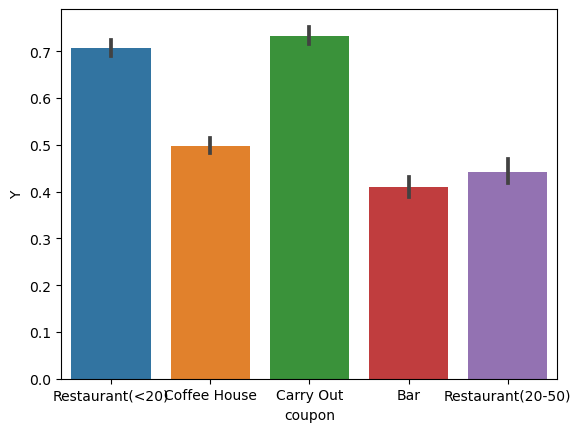

In [733]:
sns.barplot(data=data, x='coupon', y='Y')

6. Use a histogram to visualize the temperature column.

/home/archana/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


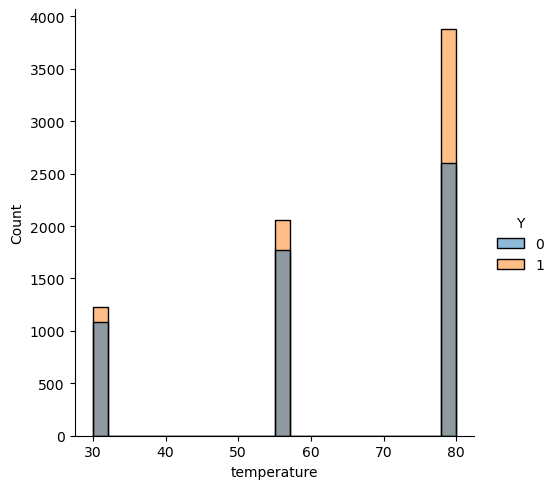

In [734]:
sns.displot(data=data, x='temperature', hue = 'Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [735]:
df_bar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [736]:
print(df_bar.shape[0], df_bar.query('Y == 1').shape[0])
coupon_accept_ratio = df_bar.query('Y == 1').shape[0] / df_bar.shape[0]
coupon_accept_ratio

2010 824


0.4099502487562189

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [739]:
data_less_3 = data.query('Bar <= 3')
data_more_3 = data.query('Bar > 3')
coupon_accept_less_3 = data_less_3.query('Y == 1').shape[0]/data.shape[0]
coupon_accept_more_3 = data_more_3.query('Y == 1').shape[0]/data.shape[0]
print(coupon_accept_less_3, coupon_accept_more_3)

0.4969865186360032 0.07057890563045202


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  